# AirBnB New York city playground

### Import necessary library

In [11]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(RColorBrewer)
library(tidyr)

### Prepare the dataframe

In [12]:
df <- read.csv("datasample_airbnb.xlsx - AirBnB_NYC.csv")

### Check dataframe info

In [13]:
str(df)

'data.frame':	30478 obs. of  13 variables:
 $ Host.Id                   : int  5162530 33134899 39608626 500 500 1039 1783 2078 2339 2339 ...
 $ Host.Since                : Factor w/ 2241 levels "","1/1/2011",..: 1 1 1 1587 1587 1775 1885 1904 1945 1945 ...
 $ Name                      : Factor w/ 29416 levels "'Do or Dwell Deux'",..: 520 27062 26773 12910 27896 5317 2678 8572 11642 16791 ...
 $ Neighbourhood             : Factor w/ 5 levels "Bronx","Brooklyn",..: 2 2 3 3 3 2 3 2 3 3 ...
 $ Property.Type             : Factor w/ 20 levels "","Apartment",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Review.Scores.Rating..bin.: int  NA NA NA NA 95 100 100 90 90 95 ...
 $ Room.Type                 : Factor w/ 3 levels "Entire home/apt",..: 1 2 2 1 2 1 1 2 1 1 ...
 $ Zipcode                   : int  11249 11206 10032 10024 10036 11222 10004 11201 10009 10009 ...
 $ Beds                      : int  1 1 1 3 3 1 1 1 2 2 ...
 $ Number.of.Records         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Number.Of.Reviews     

**The dataset contains the following fields:**

* Host.Id: the host ID
* Host.Since: the starting date of the host
* Name: the host name
* Neighbourhood: the area to which the host belongs (e.g, Bronx, Brooklyn...)
* Property.Type: the type of property (e.g, apartment...)
* Room.Type: the type of room (e.g, entire home/apt...)
* Beds: the number of bed in the room
* Price: the price for rent
* Number.Of.Reviews: the number of reviews by users
* Reriew.Scores.Rating: the scores rating of review for each room 

** Check the type of some relevant variables:**
* Neighbourhood(factor, 5 levels) 
* Property.Type(factor, 20 levels) 
* Room.Type(factor, 3 levels)
* Price(factor) : should change to numeric

Change Price type to numeric (Ex: 1,300 to 1300) 

In [14]:
df$Price <- as.numeric(gsub(",", "", df$Price))
summary(df$Price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   10.0    80.0   125.0   163.6   195.0 10000.0 

In [15]:
levels(df$Property.Type)

[1] ""                "Apartment"       "Bed & Breakfast" "Boat"           
 [5] "Bungalow"        "Cabin"           "Camper/RV"       "Castle"         
 [9] "Chalet"          "Condominium"     "Dorm"            "House"          
[13] "Hut"             "Lighthouse"      "Loft"            "Other"          
[17] "Tent"            "Townhouse"       "Treehouse"       "Villa"

In [16]:
table(df$Property.Type)


                      Apartment Bed & Breakfast            Boat        Bungalow 
              3           27102             180               8               4 
          Cabin       Camper/RV          Castle          Chalet     Condominium 
              2               7               1               1              94 
           Dorm           House             Hut      Lighthouse            Loft 
             31            2090               2               1             753 
          Other            Tent       Townhouse       Treehouse           Villa 
             47               4             136               4               8 

In [17]:
levels(df$Room.Type)

[1] "Entire home/apt" "Private room"    "Shared room"

**Convert Host.Sinnce to year and month**

In [18]:
df$Host.Since <- as.Date(df$Host.Since, format = "%m/%d/%Y")

In [19]:
df$year <- year(df$Host.Since)

In [20]:
df$month <- month(df$Host.Since)

**Check the head of the dataframe**

In [21]:
head(df)

Host.Id,Host.Since,Name,Neighbourhood,Property.Type,Review.Scores.Rating..bin.,Room.Type,Zipcode,Beds,Number.of.Records,Number.Of.Reviews,Price,Review.Scores.Rating,year,month
5162530,NA,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NA,Entire home/apt,11249,1,1,0,145,NA,NA,NA
33134899,NA,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NA,Private room,11206,1,1,1,37,NA,NA,NA
39608626,NA,Sunny Room in Harlem,Manhattan,Apartment,NA,Private room,10032,1,1,1,28,NA,NA,NA
500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NA,Entire home/apt,10024,3,1,0,199,NA,2008,6
500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95,Private room,10036,3,1,39,549,96,2008,6
1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100,Entire home/apt,11222,1,1,4,149,100,2008,7


**Save figure as file .png**

In [59]:
# Save the head of dataframe as png
library(gridExtra)
df_head <- head(df,4)
png("head-info.png",height=150, width=1450)
p<-tableGrob(df_head)
grid.arrange(p)
dev.off()

png 
  2

In [35]:
# Save the graph as figure
tiff('neigh.tiff', units="in", width=8, height=6, res=300)
dev.off()

png 
  2

## Getting insights from the dataframe

**How were the properties distributed in 5 Neighbourhoods?**

In [22]:
df_neighb <- df %>% group_by(Neighbourhood) %>% summarise(sum = n()) %>% mutate(percent = sum/sum(sum))

In [23]:
df_neighb

Neighbourhood,sum,percent
Bronx,345,0.011319640
Brooklyn,11675,0.383063193
Manhattan,16033,0.526051578
Queens,2278,0.074742437
Staten Island,147,0.004823151


**How many percentage of each Property type in New York city?**

In [24]:
remarkable_property <- c("Apartment", "Bed & Breakfast", "Condominium", "House", "Loft", "Townhouse")

In [25]:
df_proper <- df %>% group_by(Property.Type) %>% filter(Property.Type %in% remarkable_property) %>% summarise(count = n()) %>%
                    mutate(percent = count/sum(count))

In [26]:
df_proper

Property.Type,count,percent
Apartment,27102,0.892834788
Bed & Breakfast,180,0.005929830
Condominium,94,0.003096689
House,2090,0.068851919
Loft,753,0.024806457
Townhouse,136,0.004480316


## Data Visualization

In [28]:
# Set univeral plot size:
options(repr.plot.width=5, repr.plot.height=4)

**1. Plot the barchart which present the amount of properties in New york city**

Saving 6.67 x 6.67 in image


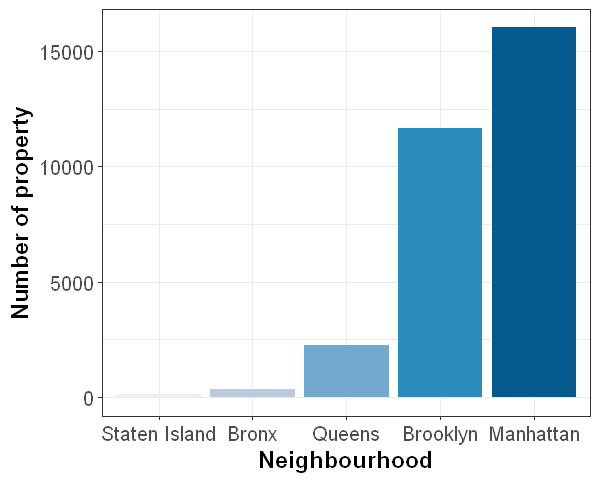

In [29]:
ggplot(df_neighb, aes(x = reorder(Neighbourhood, sum), y = sum, fill = reorder(Neighbourhood, sum))) + 
    geom_bar(stat = "identity") +
    labs(x =  "Neighbourhood", y ="Number of property") +
    scale_fill_brewer(palette = "PuBu") +  theme_bw() + 
    theme(legend.position = "none", axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) +
    ggsave("plot1.png")

**Conclusion: There are 5 neighborhoods in the New York city: Staten Island, Bronx, Queens, Brooklyn, and Manhattan.
Manhattan and Brooklyn had the most number properties for rent.**

**2. The number of Property types for rent**

Saving 6.67 x 6.67 in image


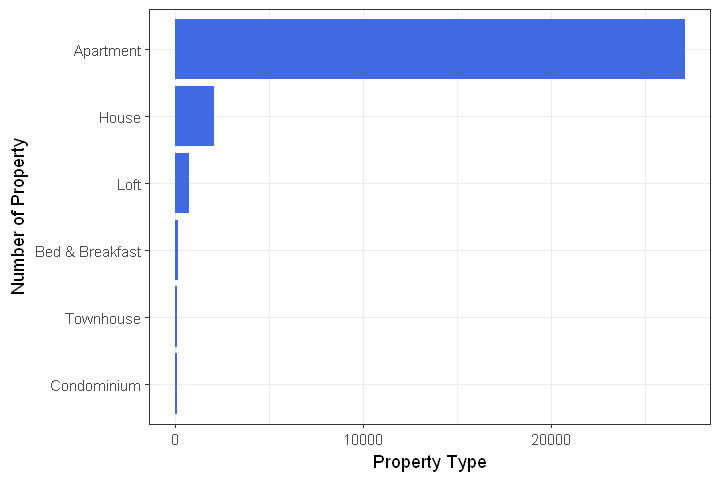

In [30]:
# Plot the bar chart with horizon = TRUE, use geom_bar + coord_flip()
options(repr.plot.width=6, repr.plot.height=4)    
ggplot(df_proper, aes(x = reorder(Property.Type, count), y = count)) + 
    geom_bar(stat = "identity", fill = "royalblue") + coord_flip() + 
    theme(axis.text=element_text(size=18), axis.title=element_text(size=20,face="bold")) + theme_bw() +
    labs(x = "Number of Property", y = "Property Type") +
    ggsave("plot2.png")

** Conclusion: There was a various of property types for rent, but apartment occupied the most percentage (89%).**

**3. The proportion of Room types in 5 neighbourhoods**

Saving 6.67 x 6.67 in image


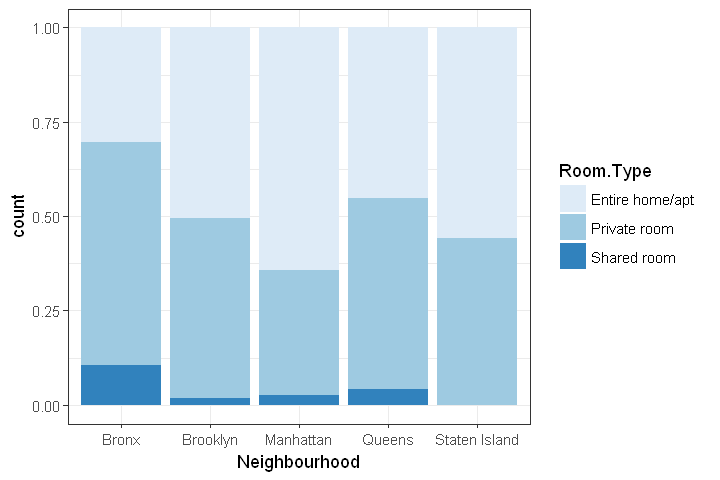

In [31]:
# This chart shows the room type of each area for rent: 
df %>% filter(Property.Type == "Apartment") %>%
    ggplot(aes(x = Neighbourhood, fill = Room.Type)) + geom_bar(position = "fill") + 
    theme_bw() + scale_fill_brewer(palette = "Blues") +
    ggsave("plot3.png")

Saving 6.67 x 6.67 in image


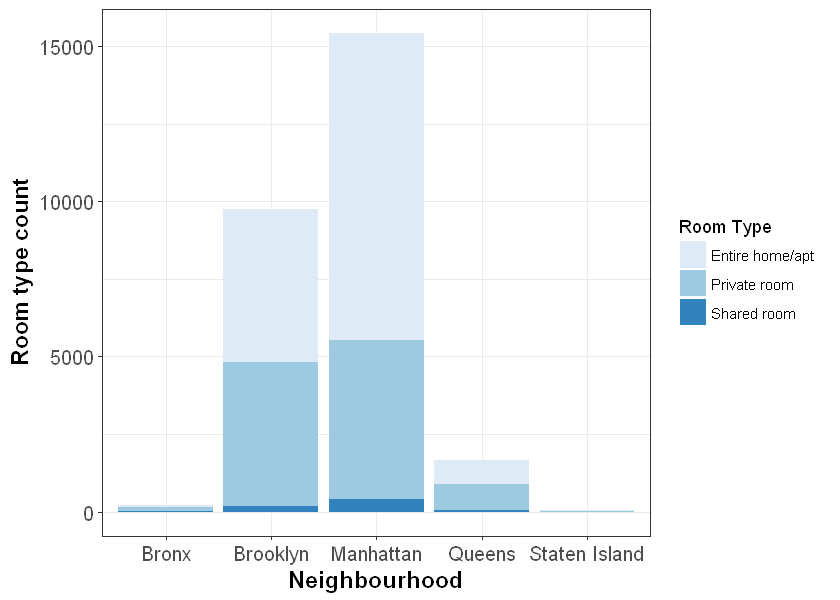

In [32]:
options(repr.plot.width=7, repr.plot.height=5)
df %>% filter(Property.Type == "Apartment") %>% 
    ggplot(aes(x = Neighbourhood, fill = Room.Type)) + geom_bar(position = "stack") + theme_bw() +
    ylab("Room type count") + scale_fill_brewer(palette = "Blues", name = "Room Type") +
    theme(axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) +
    ggsave("plot4.png")

**Conclusion: Manhattan had the most entire home/apt for rent.
Shared rooms accounted for an insignificant percentage comparing to two other types.**

**4. The relationship between Price and Review Scores Rating**

Saving 6.67 x 6.67 in image


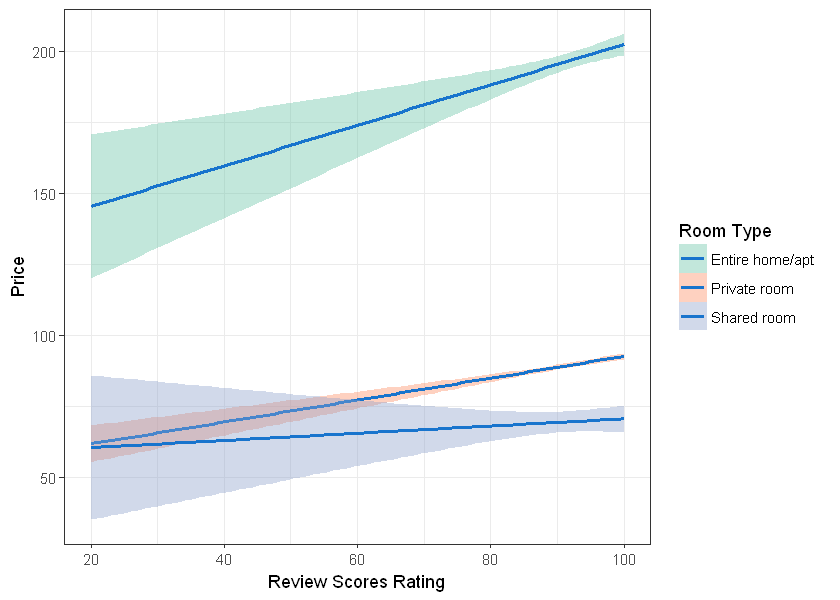

In [33]:
# The line graph presents the trend of Scores rating following the Price for each type of room:
# The blue line on the plot represents the linear function we've fitted and shows that there is a relationship between how much price of each room type and how many scores rating of reviews: 
# the color shape behind the line: is the confidence interval for this function. It outlines the area that should contain the line which represents the true function 95% of the time.

df %>% filter(Property.Type == "Apartment"  & !is.na(Review.Scores.Rating)) %>% 
    ggplot(aes(x = Review.Scores.Rating, y = Price, fill = Room.Type)) + geom_smooth(method = "lm", colour = "dodgerblue3") +
    theme(axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) + theme_bw() +
    xlab("Review Scores Rating") + scale_fill_brewer(palette = "Set2", name = "Room Type") +
    ggsave("plot5.png")

**Conclusion: In general, the price of room types increased with the review score rating, which might mean the rooms with good review were able to place a higher price.**

**5. The number of reviews vs price**

Saving 6.67 x 6.67 in image


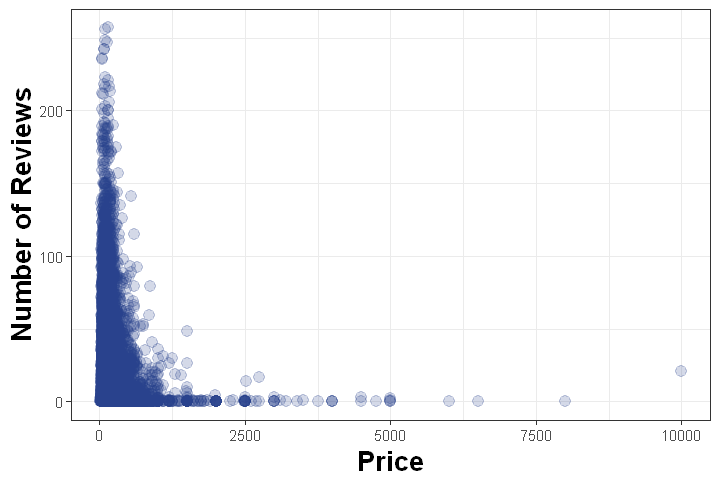

In [34]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(df, aes(x = Price, y = Number.Of.Reviews)) + geom_point(color="royalblue4", alpha = 0.2, size =3) + 
    theme_bw() + theme(axis.title=element_text(size=16,face="bold")) +
    ylab("Number of Reviews") +
    ggsave("plot7.png")

**Conclusion: The low price rentals were more affordable thus the higher number in reviews.**

**6. The average rental price in 5 areas**

In [35]:
options(repr.plot.width=7, repr.plot.height=4)

Saving 6.67 x 6.67 in image


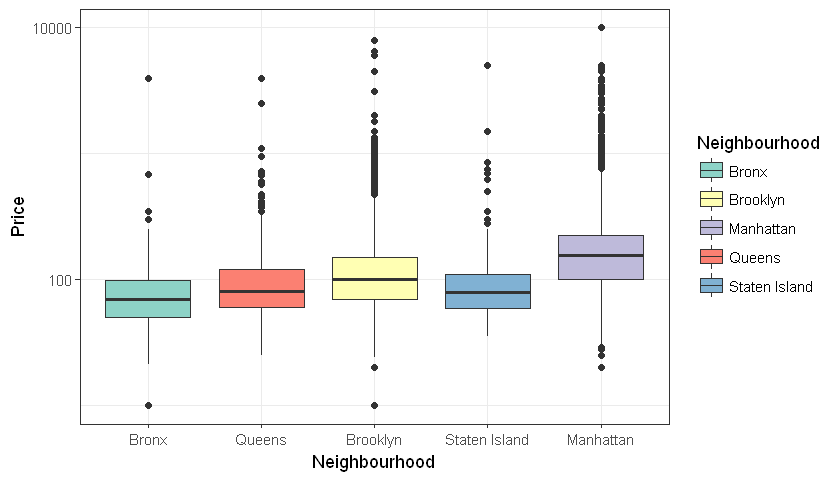

In [36]:
ggplot(df, aes(x = reorder(Neighbourhood, Price), y = Price, fill = Neighbourhood)) + 
    geom_boxplot() + scale_y_log10() + scale_fill_brewer(palette = "Set3") + xlab("Neighbourhood") +
    theme(legend.position = "none",axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) + theme_bw()
    ggsave("plot8.png")

**Conclusion: Although Manhattan and Brooklyn accounted for 52% and 38% rentals in the New York city, the average rental prices of the two places were higher than others.
The difference of rental cost between all areas was not significant. The price range of all neighborhoods was quite large.**

**7. The change of property for monthly and annual rental**

In [37]:
library(scales)
options(repr.plot.width=5, repr.plot.height=4)

Saving 6.67 x 6.67 in image


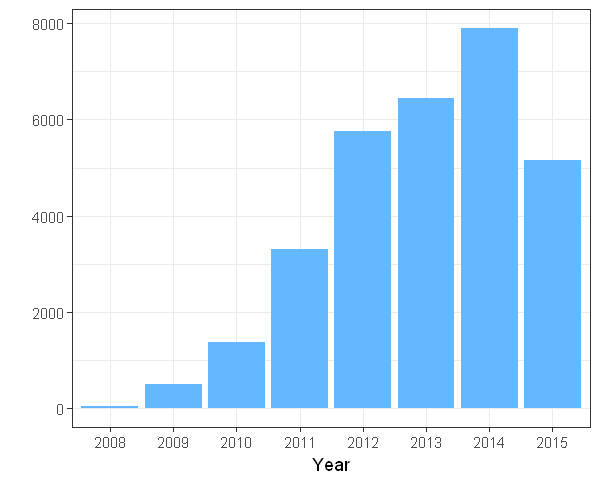

In [38]:
df %>% filter(!is.na(year)) %>% group_by(year) %>% summarize(sum = n()) %>%
    ggplot(aes(x = factor(year), y = sum)) + geom_bar(stat = "identity", fill = "steelblue1") + 
    theme(axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) + theme_bw() +
    labs(x = "Year", y = "") + ggsave("plot9.png")

Saving 6.67 x 6.67 in image


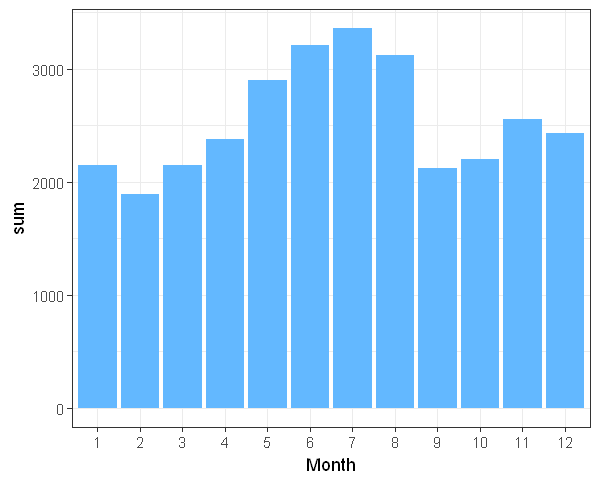

In [39]:
df %>% filter(!is.na(month)) %>% group_by(month) %>% summarize(sum = n()) %>%
    ggplot(aes(x = factor(month), y = sum)) + geom_bar(stat = "identity", fill = "steelblue1") + 
    theme(axis.text=element_text(size=12), axis.title=element_text(size=16,face="bold")) + theme_bw() +
    labs(x = "Month") + ggsave("plot12.png")

**Conclusion: From 2008 to 2014, the property and the rental cost ascended moderately. However, there was a sudden drop in 2015. 
As more and more properties were for rent caused New York’s rental market became over–saturated leading to high supply and low demand. Therefore, a decline in number of rentals occurred in 2015.**

**8. The average monthly and annual rental cost**

Saving 6.67 x 6.67 in image


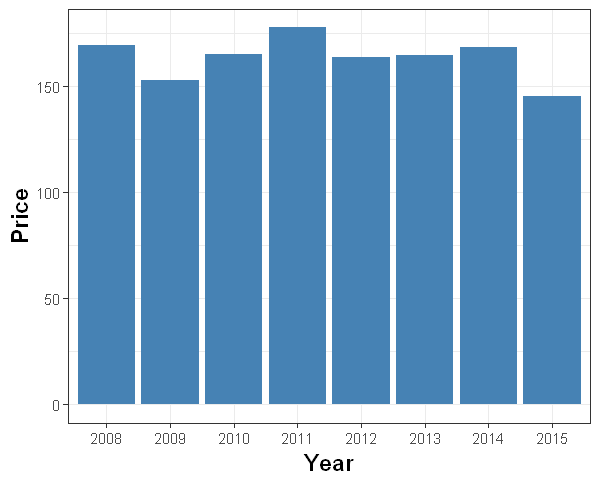

In [40]:
options(repr.plot.width=5, repr.plot.height=4)
df %>% group_by(year) %>% filter(year != "NA") %>% summarize(avg = mean(Price)) %>%
    ggplot(aes(x = as.factor(year), y = avg)) + geom_bar(stat = "identity",  fill = "steelblue") + 
    labs(x = "Year", y = "Price") + theme_bw() + theme(axis.title=element_text(size=14,face="bold")) +
    ggsave("plot10.png")

In [41]:
summary(df %>% group_by(year) %>% filter(year != "NA") %>% summarize(avg = mean(Price)))

      year           avg       
 Min.   :2008   Min.   :145.5  
 1st Qu.:2010   1st Qu.:161.1  
 Median :2012   Median :165.2  
 Mean   :2012   Mean   :163.5  
 3rd Qu.:2013   3rd Qu.:168.6  
 Max.   :2015   Max.   :177.8  

Saving 6.67 x 6.67 in image


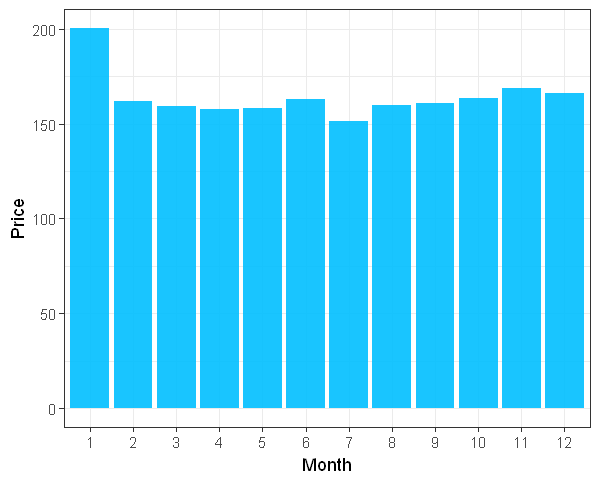

In [42]:
df %>% group_by(month) %>% filter(month != "NA") %>% summarize(avg = mean(Price)) %>%
    ggplot(aes(x = as.factor(month), y = avg)) + geom_bar(stat = "identity", fill = "deepskyblue", alpha = 0.9) + 
    theme(axis.title=element_text(size=30,face="bold")) +
    labs(x= "Month", y = "Price") + theme_bw() +
    ggsave("plot11.png")

**Conclusion: The average rental price following by month and year didn’t change much**